Installing the required packages and Import required function

In [411]:
# Package Installation
'''
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install sklearn
! pip install imblearn
'''

'\n! pip install pandas\n! pip install numpy\n! pip install matplotlib\n! pip install sklearn\n! pip install imblearn\n'

In [412]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics  import accuracy_score, classification_report, confusion_matrix

In [413]:
# Read the provided csv file and checked the data frame's shape.
base_df = pd.read_csv("https://raw.githubusercontent.com/doaa-altarawy/BreastCancer/master/breast-cancer-wisconsin.csv", header=None)
base_df.shape

(699, 11)

In [414]:
# Checked the first few rows and renamed each feature column in accordance with the given description because a header is missing from the provided csv file.
base_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [415]:
# Rename columns as header not provided in the given dataset
base_df.rename(columns={0: 'sample_number', 1: 'clump_thickness', 2: 'uniformity_cell_size', 3: 'uniformity_cell_shape',\
    4: 'marginal_adhesion', 5: 'single_epithelial_cell_size', 6: 'bare_nuclei', 7: 'bland_chromatin', 8: 'normal_nucleoli',\
        9: 'mitoses', 10: 'class'}, inplace=True)

In [416]:
# Checked a few observations.
base_df.head()

,sample_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [417]:
# Check for null values in the each variable
base_df.isnull().sum()

sample_number                  0
clump_thickness                0
uniformity_cell_size           0
uniformity_cell_shape          0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
class                          0
dtype: int64

In [418]:
# Check for unique values in the each variable
print(base_df.nunique())

sample_number                  645
clump_thickness                 10
uniformity_cell_size            10
uniformity_cell_shape           10
marginal_adhesion               10
single_epithelial_cell_size     10
bare_nuclei                     11
bland_chromatin                 10
normal_nucleoli                 10
mitoses                          9
class                            2
dtype: int64


In [419]:
# Check for duplicate records by considering each variable
print("Total No. of Duplicate Samples:", base_df.duplicated(subset=None, keep='last').sum())
duplicate_rows = base_df[base_df.duplicated(subset=None, keep='last')]
print("Duplicate Samples:")
duplicate_rows

Total No. of Duplicate Samples: 8
Duplicate Samples:


,sample_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
42,1100524,6,10,10,2,8,10,7,3,3,4
62,1116116,9,10,10,1,10,8,3,3,1,4
168,1198641,3,1,1,1,2,1,3,1,1,2
207,1218860,1,1,1,1,1,1,3,1,1,2
267,320675,3,3,5,2,3,10,7,1,1,4
314,704097,1,1,1,1,1,1,2,1,1,2
560,1321942,5,1,1,1,2,1,3,1,1,2
683,466906,1,1,1,1,2,1,1,1,1,2


In [420]:
# By keeping las occurence of the record removing other duplicate records 
df = base_df.copy()
df.drop_duplicates(subset=None, keep='last', inplace=True)

In [421]:
# Check for duplicate records by considering each variable again
print("Total No. of Duplicate Samples:", df.duplicated(subset=None, keep='last').sum())

Total No. of Duplicate Samples: 0


In [422]:
# Check for unique values in the each variable to varify
print(df.nunique())

sample_number                  645
clump_thickness                 10
uniformity_cell_size            10
uniformity_cell_shape           10
marginal_adhesion               10
single_epithelial_cell_size     10
bare_nuclei                     11
bland_chromatin                 10
normal_nucleoli                 10
mitoses                          9
class                            2
dtype: int64


In [423]:
# Check for duplicate records by considering only smape number variable
print("Total No. of Duplicate Samples:", df.duplicated(subset='sample_number', keep='last').sum())
duplicate_rows = df[df.duplicated(subset='sample_number', keep='last')]
print("Duplicate Samples:")
duplicate_rows

Total No. of Duplicate Samples: 46
Duplicate Samples:


,sample_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
4,1017023,4,1,1,3,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
29,1070935,1,1,3,1,2,1,1,1,1,2
47,1105524,1,1,1,1,2,1,2,1,1,2
61,1115293,1,1,1,1,2,2,2,1,1,2
64,1116192,1,1,1,1,2,1,2,1,1,2
81,1143978,4,1,1,2,2,1,2,1,1,2
93,1158247,1,1,1,1,2,1,2,1,1,2
104,1168736,10,10,10,10,10,1,8,8,8,4
108,1171710,1,1,1,1,2,1,2,3,1,2


In [424]:
# By keeping las occurence of the record removing other duplicate records 
df.drop_duplicates(subset='sample_number', keep='last', inplace=True)

In [425]:
# Check for unique values in the each variable to check other categorical variables
print(df.nunique())

sample_number                  645
clump_thickness                 10
uniformity_cell_size            10
uniformity_cell_shape           10
marginal_adhesion               10
single_epithelial_cell_size     10
bare_nuclei                     11
bland_chromatin                 10
normal_nucleoli                 10
mitoses                          9
class                            2
dtype: int64


In [426]:
# check what other extra values present in bare nuclei variable
print(df['bare_nuclei'].value_counts())

1     358
10    128
2      29
5      29
3      27
8      20
4      18
?      15
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64


In [427]:
# Remove records containing unreverent categorical value records
indexes = df[df['bare_nuclei'] == '?'].index
df.drop(indexes, inplace=True)

In [428]:
# Final data frame shape check
df.shape

(630, 11)

In [429]:
# check data types of the variable
print(df.dtypes)

sample_number                   int64
clump_thickness                 int64
uniformity_cell_size            int64
uniformity_cell_shape           int64
marginal_adhesion               int64
single_epithelial_cell_size     int64
bare_nuclei                    object
bland_chromatin                 int64
normal_nucleoli                 int64
mitoses                         int64
class                           int64
dtype: object


In [430]:
# Change bare_nuclei vairblae data type from object to int
df['bare_nuclei'] = df['bare_nuclei'].astype(int)

I'm finishing up the cleaning and prepping process here. While cleaning, I removed certain records in order to maintain only the most recent accessible observations rather keeping duplicate sample records. After that, any unwanted value records in categorical variables that could affect our forecast were eliminated from the data frame, as well as any necessary data type changes for the variable before diving into each variable.

Text(0.5, 1.0, 'Uniformity Cell Shape')

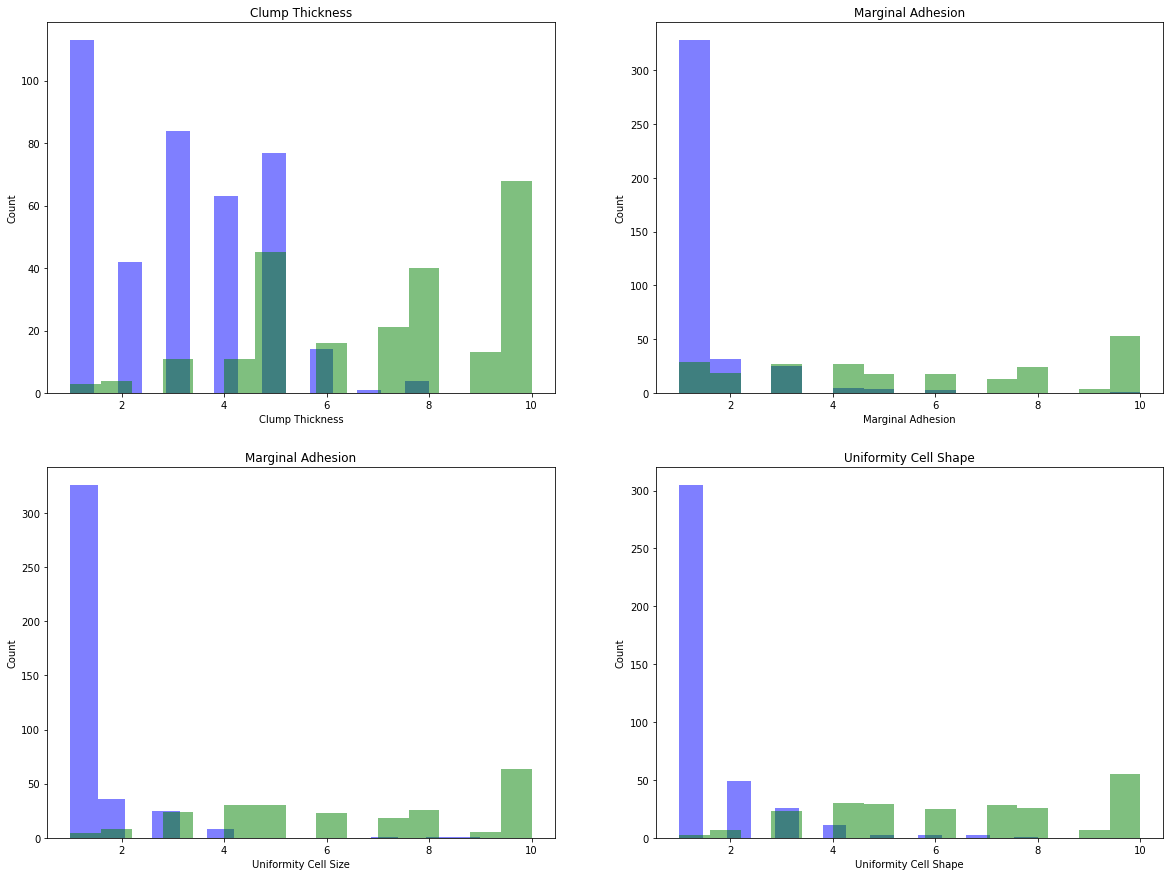

In [431]:
# Explore some categorical variable using histogram for each feature and bifurcate using target variables
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
plt.hist(df[df["class"]==2]["clump_thickness"], bins=15, alpha=0.5, color="blue", label="benign")
plt.hist(df[df["class"]==4]["clump_thickness"], bins=15, alpha=0.5, color="green", label="malignant")
plt.xlabel("Clump Thickness")
plt.ylabel("Count")
plt.title("Clump Thickness")

plt.subplot(2,2,2)
plt.hist(df[df["class"]==2]["marginal_adhesion"], bins=15, alpha=0.5, color="blue", label="benign")
plt.hist(df[df["class"]==4]["marginal_adhesion"], bins=15, alpha=0.5, color="green", label="malignant")
plt.xlabel("Marginal Adhesion")
plt.ylabel("Count")
plt.title("Marginal Adhesion")

plt.subplot(2,2,3)
plt.hist(df[df["class"]==2]["uniformity_cell_size"], bins=15, alpha=0.5, color="blue", label="benign")
plt.hist(df[df["class"]==4]["uniformity_cell_size"], bins=15, alpha=0.5, color="green", label="malignant")
plt.xlabel("Uniformity Cell Size")
plt.ylabel("Count")
plt.title("Marginal Adhesion")

plt.subplot(2,2,4)
plt.hist(df[df["class"]==2]["uniformity_cell_shape"], bins=15, alpha=0.5, color="blue", label="benign")
plt.hist(df[df["class"]==4]["uniformity_cell_shape"], bins=15, alpha=0.5, color="green", label="malignant")
plt.xlabel("Uniformity Cell Shape")
plt.ylabel("Count")
plt.title("Uniformity Cell Shape")

Text(0.5, 1.0, 'Normal Nucleoli')

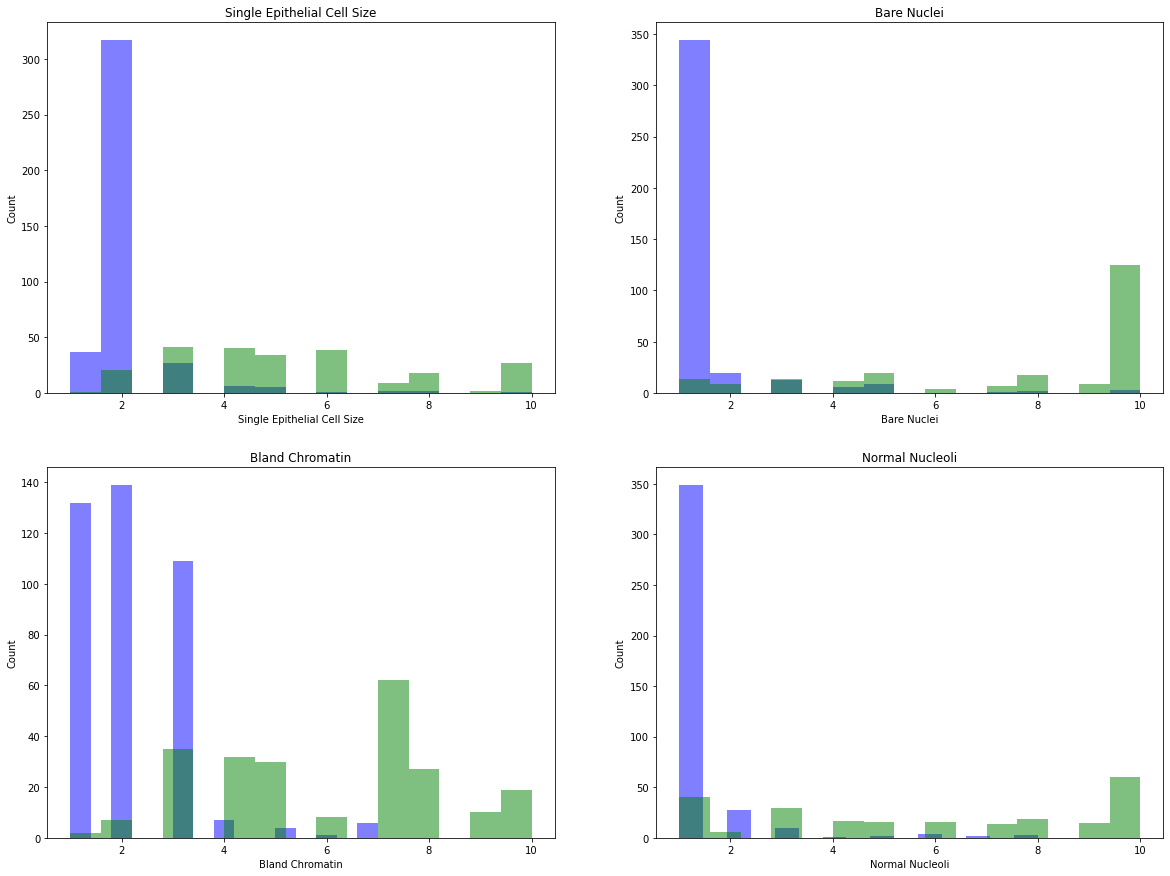

In [432]:
# Explore other categorical variable using histogram for each feature and bifurcate using target variables
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
plt.hist(df[df["class"]==2]["single_epithelial_cell_size"], bins=15, alpha=0.5, color="blue", label="benign")
plt.hist(df[df["class"]==4]["single_epithelial_cell_size"], bins=15, alpha=0.5, color="green", label="malignant")
plt.xlabel("Single Epithelial Cell Size")
plt.ylabel("Count")
plt.title("Single Epithelial Cell Size")

plt.subplot(2,2,2)
plt.hist(df[df["class"]==2]["bare_nuclei"], bins=15, alpha=0.5, color="blue", label="benign")
plt.hist(df[df["class"]==4]["bare_nuclei"], bins=15, alpha=0.5, color="green", label="malignant")
plt.xlabel("Bare Nuclei")
plt.ylabel("Count")
plt.title("Bare Nuclei")

plt.subplot(2,2,3)
plt.hist(df[df["class"]==2]["bland_chromatin"], bins=15, alpha=0.5, color="blue", label="benign")
plt.hist(df[df["class"]==4]["bland_chromatin"], bins=15, alpha=0.5, color="green", label="malignant")
plt.xlabel("Bland Chromatin")
plt.ylabel("Count")
plt.title("Bland Chromatin")

plt.subplot(2,2,4)
plt.hist(df[df["class"]==2]["normal_nucleoli"], bins=15, alpha=0.5, color="blue", label="benign")
plt.hist(df[df["class"]==4]["normal_nucleoli"], bins=15, alpha=0.5, color="green", label="malignant")
plt.xlabel("Normal Nucleoli")
plt.ylabel("Count")
plt.title("Normal Nucleoli")

Text(0.5, 1.0, 'Mitoses')

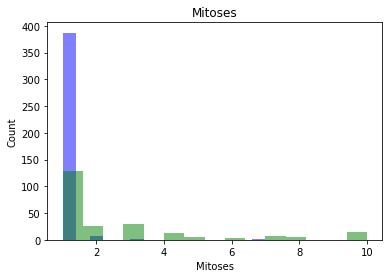

In [433]:
# Explore last remaining categorical variable using histogram for each feature and bifurcate using target variables
plt.hist(df[df["class"]==2]["mitoses"], bins=15, alpha=0.5, color="blue", label="benign")
plt.hist(df[df["class"]==4]["mitoses"], bins=15, alpha=0.5, color="green", label="malignant")
plt.xlabel("Mitoses")
plt.ylabel("Count")
plt.title("Mitoses")

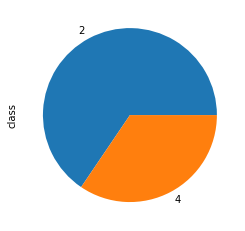

In [434]:
# check praportion of each target value
base_df['class'].value_counts(normalize=True).plot.pie()
plt.show()

I've done experimenting with various factors using visualisation. As demonstrated above, our goal variable is slightly imbalanced, as evidenced by the histograms of each categorical variable. However, when values for each target class are sprayed in each variable, rather than picking all or any variables because all we have are categorical variables, I assessed whether or not our variable is beneficial in predicting our target class.

In [435]:
# Spliting class variable and other vairbales
X,y = df.copy(), df['class']
X.drop(['class', 'sample_number'], inplace=True, axis=1)

In [436]:
# Function to print chisquare result
def print_chisquare_result(colX_label, p_value, alpha):
    result = ""
    if p_value < alpha:
        result="{0} is valuable predictor".format(colX_label)
    else:
        result="{0} is avoidable predictor. (Discard {0} from model)".format(colX_label)
    print(result)

In [437]:
# Chisquare test for each vategorical variable
chi_scores = chi2(X, y)
for i in range(0, len(X.columns)):
    print_chisquare_result(colX_label=X.columns[i], p_value=chi_scores[1][i], alpha=0.05) 

clump_thickness is valuable predictor
uniformity_cell_size is valuable predictor
uniformity_cell_shape is valuable predictor
marginal_adhesion is valuable predictor
single_epithelial_cell_size is valuable predictor
bare_nuclei is valuable predictor
bland_chromatin is valuable predictor
normal_nucleoli is valuable predictor
mitoses is valuable predictor


As we can see from the chi-square results, each variable has the potential to predict our target variable. Instead of delving deeper, I am now using all of the variables to build a model that can predict if a person has BreastCancer or not if we have provided sample feature values.

While partitioning the dataset into training and test datasets, we discovered that the proportion of each class value in the given dataset is little uneven, thus I employed oversampleing.

In [438]:
# Oversampleing
over_sample = RandomOverSampler(random_state=10)

# Spliting dataset into train and test dataset
X_res, y_res = over_sample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,\
     test_size=0.25, random_state = 8)

I created a model using the decision tree algorithm with default parameters that I thought would be a decent approach for such a dataset and context, and then compared statistics like accuracy and F1 score. There is no need to prepare data for this algorithm, and it may provide understandable explanations over the end prediction, which can help to understand the cause of forecasting breast cancer because the algorithm uses a tree datastructure that is straightforward to examine.

In [439]:
# Model with an initial parameter setting
DecisionTree_model = DecisionTreeClassifier()
DecisionTree_model = DecisionTree_model.fit(X_train, y_train)
DecisionTree_y_pred = DecisionTree_model.predict(X_test)
print("Decision Tree \n Accuracy:", accuracy_score(y_test, DecisionTree_y_pred))

# Confusion Matrix
print("Confusion Matrix \n:")
DecisionTree_conf_matrix = confusion_matrix(DecisionTree_y_pred, y_test)
print(DecisionTree_conf_matrix)
print(classification_report(y_test, DecisionTree_y_pred))

Decision Tree 
 Accuracy: 0.949748743718593
Confusion Matrix 
:
[[93  4]
 [ 6 96]]
              precision    recall  f1-score   support

           2       0.96      0.94      0.95        99
           4       0.94      0.96      0.95       100

    accuracy                           0.95       199
   macro avg       0.95      0.95      0.95       199
weighted avg       0.95      0.95      0.95       199



Looking at the above model statistics, it is obvious that the decision tree classification prediction model can predict the target variable with 95% accuracy. More importantly, the confusion matrix model predicts decreased False Negative and False Positive rates, which is critical in the health care arena. Lower False Negative decided that our model is working well. However, for testing purposes, I used K fold cross validation and the average accuracy score.

In [440]:
k_folds = KFold(n_splits = 5)

scores = cross_val_score(DecisionTree_model, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.9047619  0.92857143 0.92063492 0.96031746 0.92857143]
Average CV Score:  0.9285714285714286
Number of CV Scores used in Average:  5


In conclusion, although our model performs well, more research is needed to fully understand each feature variable and its impact on detecting breast cancer.